In [27]:
import gym
import time
import matplotlib.pyplot as plt
import torch

from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False},
)

## Q-learning

\begin{align}
Q_t(s, a) &= Q_{t-1}(s, a) - a \cdot \text{TD} \\
&= Q(s, a)+\alpha \left[r+\gamma * \max _{a^{\prime}} Q\left(s^{\prime}, a^{\prime}\right)-Q(s, a)\right] \\
&=(1-\alpha) Q(s, a)+\alpha \left[r+\gamma * \max _{a^{\prime}} Q\left(s^{\prime}, a^{\prime}\right)\right]
\end{align}

# <img src="../img/Q-learning_CH6.5.png">

### Q-learning in a deterministic environment

Also named off-policy TD control for estimating the policy, can be found in chapter 6.5 by Barto & Sutton. The reason that Q-learning is off-policy is that it updates its Q-values using the Q-value of the next state 𝑠′ and the greedy action 𝑎′. In other words, it estimates the return (total discounted future reward) for state-action pairs assuming a greedy policy were followed despite the fact that it's not following a greedy policy.

Number of actions 4
Episode finished after 10 steps
Episode finished after 12 steps
Episode finished after 5 steps
Episode finished after 4 steps
Episode finished after 12 steps
Episode finished after 7 steps
Episode finished after 4 steps
Episode finished after 21 steps
Episode finished after 7 steps
Episode finished after 10 steps
Episode finished after 13 steps
Episode finished after 10 steps
Episode finished after 5 steps
Episode finished after 15 steps
Episode finished after 4 steps
Episode finished after 2 steps
Episode finished after 7 steps
Episode finished after 7 steps
Episode finished after 7 steps
Episode finished after 5 steps
Episode finished after 12 steps
Episode finished after 4 steps
Episode finished after 14 steps
Episode finished after 2 steps
Episode finished after 8 steps
Episode finished after 27 steps
Episode finished after 6 steps
Episode finished after 5 steps
Episode finished after 6 steps
Episode finished after 7 steps
Episode finished after 16 steps
Episode

Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode 

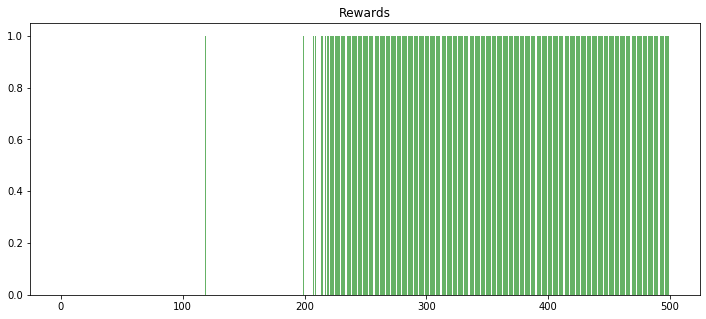

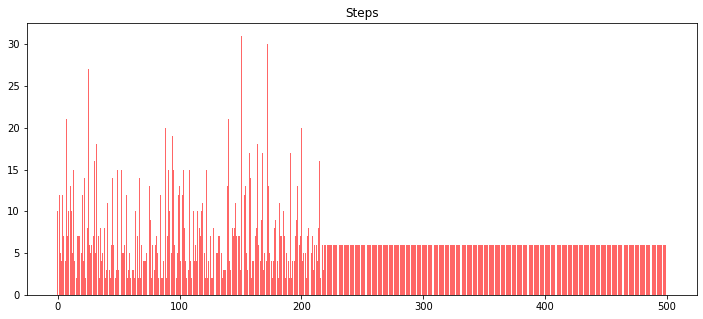

In [20]:
env = gym.make('FrozenLakeNotSlippery-v0')
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n

rewards_total = []
steps_total = []

print("Number of actions %i" % env.action_space.n)


# Parameters belonging to the algorithm
num_episodes = 500
gamma = 1
alpha = 0.5

Q = torch.zeros([number_of_states, number_of_actions])

# Loop for each episode
for i in range(num_episodes):
    # Initiatize S
    observation = env.reset()
    steps = 0
    
    while True:
        steps += 1

        # Choose next A from S using policy derived from Q
        # Adding randomness to explore
        random_values = Q[observation] + torch.randn(1, number_of_actions)/1000
        action = torch.argmax(random_values).item()
        
        # Take action A, observce R, S'
        new_observation, reward, done, info = env.step(action)

        # Q(S, A) <- Q(S, A) + alpha[R + gamma max_a(S', a) - Q(S, A)]
        Q[observation, action] += alpha * (reward + gamma * torch.max(Q[new_observation]).item() - Q[observation, action])

        # S <- S'
        observation = new_observation        
        
        # Terminate if environment is done
        if done:
            # Store statistics
            steps_total.append(steps)
            rewards_total.append(reward)
            print("Episode finished after %i steps" % steps)
            break

# Simple statistics of solving the environment     
print(Q)

print("Percentage of episodes finished succesfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percentage of episodes finished succesfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.figure(figsize=(12, 5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()

plt.figure(figsize=(12, 5))
plt.title("Steps")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red')
plt.show()

### Q-learning in stochastic environement

This shows how the current implementation does not do well in stochastic environments due to it's implementation.

Number of actions 4
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 4 steps
Episode finished after 14 steps
Episode finished after 7 steps
Episode finished after 8 steps
Episode finished after 17 steps
Episode finished after 2 steps
Episode finished after 11 steps
Episode finished after 9 steps
Episode finished after 9 steps
Episode finished after 7 steps
Episode finished after 2 steps
Episode finished after 7 steps
Episode finished after 12 steps
Episode finished after 3 steps
Episode finished after 9 steps
Episode finished after 19 steps
Episode finished after 10 steps
Episode finished after 2 steps
Episode finished after 8 steps
Episode finished after 4 steps
Episode finished after 15 steps
Episode finished after 12 steps
Episode finished after 11 steps
Episode finished after 8 steps
Episode finished after 20 steps
Episode finished after 9 steps
Episode finished after 4 steps
Episode finished after 6 steps
Episode f

Episode finished after 14 steps
Episode finished after 34 steps
Episode finished after 29 steps
Episode finished after 25 steps
Episode finished after 23 steps
Episode finished after 15 steps
Episode finished after 35 steps
Episode finished after 53 steps
Episode finished after 20 steps
Episode finished after 11 steps
Episode finished after 15 steps
Episode finished after 2 steps
Episode finished after 82 steps
Episode finished after 12 steps
Episode finished after 14 steps
Episode finished after 7 steps
Episode finished after 16 steps
Episode finished after 34 steps
Episode finished after 9 steps
Episode finished after 9 steps
Episode finished after 14 steps
Episode finished after 23 steps
Episode finished after 19 steps
Episode finished after 19 steps
Episode finished after 33 steps
Episode finished after 13 steps
Episode finished after 7 steps
Episode finished after 9 steps
Episode finished after 5 steps
Episode finished after 10 steps
Episode finished after 11 steps
Episode finishe

Episode finished after 5 steps
Episode finished after 45 steps
Episode finished after 23 steps
Episode finished after 33 steps
Episode finished after 25 steps
Episode finished after 15 steps
Episode finished after 100 steps
Episode finished after 23 steps
Episode finished after 19 steps
Episode finished after 52 steps
Episode finished after 16 steps
Episode finished after 31 steps
Episode finished after 8 steps
Episode finished after 9 steps
Episode finished after 99 steps
Episode finished after 43 steps
Episode finished after 7 steps
Episode finished after 100 steps
Episode finished after 24 steps
Episode finished after 100 steps
Episode finished after 60 steps
Episode finished after 100 steps
Episode finished after 70 steps
Episode finished after 100 steps
Episode finished after 43 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 70 steps
Episode finished after 33 steps
Episode finished after 36 steps
Episode finished after 33 steps
Episode f

Episode finished after 64 steps
Episode finished after 53 steps
Episode finished after 81 steps
Episode finished after 19 steps
Episode finished after 23 steps
Episode finished after 26 steps
Episode finished after 65 steps
Episode finished after 36 steps
Episode finished after 100 steps
Episode finished after 90 steps
Episode finished after 12 steps
Episode finished after 23 steps
Episode finished after 8 steps
Episode finished after 26 steps
Episode finished after 35 steps
Episode finished after 15 steps
Episode finished after 30 steps
Episode finished after 58 steps
Episode finished after 43 steps
Episode finished after 11 steps
Episode finished after 56 steps
Episode finished after 81 steps
Episode finished after 79 steps
Episode finished after 29 steps
Episode finished after 66 steps
Episode finished after 14 steps
Episode finished after 15 steps
Episode finished after 28 steps
Episode finished after 31 steps
Episode finished after 34 steps
Episode finished after 51 steps
Episode 

Episode finished after 100 steps
Episode finished after 100 steps
Episode finished after 62 steps
Episode finished after 15 steps
Episode finished after 39 steps
Episode finished after 16 steps
Episode finished after 56 steps
Episode finished after 61 steps
Episode finished after 28 steps
Episode finished after 67 steps
Episode finished after 65 steps
Episode finished after 67 steps
Episode finished after 39 steps
Episode finished after 31 steps
Episode finished after 48 steps
Episode finished after 45 steps
Episode finished after 15 steps
Episode finished after 34 steps
Episode finished after 72 steps
Episode finished after 18 steps
Episode finished after 11 steps
Episode finished after 22 steps
Episode finished after 39 steps
Episode finished after 47 steps
Episode finished after 59 steps
Episode finished after 88 steps
Episode finished after 14 steps
Episode finished after 35 steps
Episode finished after 19 steps
Episode finished after 31 steps
Episode finished after 14 steps
Episod

Episode finished after 38 steps
Episode finished after 30 steps
Episode finished after 16 steps
Episode finished after 59 steps
Episode finished after 33 steps
Episode finished after 11 steps
Episode finished after 25 steps
Episode finished after 27 steps
Episode finished after 19 steps
Episode finished after 19 steps
Episode finished after 18 steps
Episode finished after 51 steps
Episode finished after 66 steps
Episode finished after 17 steps
Episode finished after 59 steps
Episode finished after 8 steps
Episode finished after 39 steps
Episode finished after 21 steps
Episode finished after 17 steps
Episode finished after 58 steps
Episode finished after 11 steps
Episode finished after 49 steps
Episode finished after 100 steps
Episode finished after 15 steps
Episode finished after 34 steps
Episode finished after 21 steps
Episode finished after 61 steps
Episode finished after 54 steps
Episode finished after 22 steps
Episode finished after 23 steps
Episode finished after 27 steps
Episode 

Episode finished after 74 steps
Episode finished after 45 steps
Episode finished after 17 steps
Episode finished after 65 steps
Episode finished after 100 steps
Episode finished after 23 steps
Episode finished after 68 steps
Episode finished after 100 steps
Episode finished after 27 steps
Episode finished after 77 steps
Episode finished after 43 steps
Episode finished after 25 steps
Episode finished after 100 steps
Episode finished after 46 steps
Episode finished after 55 steps
Episode finished after 32 steps
Episode finished after 27 steps
Episode finished after 71 steps
Episode finished after 34 steps
Episode finished after 18 steps
Episode finished after 47 steps
Episode finished after 34 steps
Episode finished after 35 steps
Episode finished after 37 steps
Episode finished after 48 steps
Episode finished after 28 steps
Episode finished after 22 steps
Episode finished after 34 steps
Episode finished after 20 steps
Episode finished after 17 steps
Episode finished after 24 steps
Episo

Episode finished after 23 steps
Episode finished after 24 steps
Episode finished after 54 steps
Episode finished after 53 steps
Episode finished after 25 steps
Episode finished after 36 steps
Episode finished after 56 steps
Episode finished after 33 steps
Episode finished after 16 steps
Episode finished after 60 steps
Episode finished after 15 steps
Episode finished after 57 steps
Episode finished after 25 steps
Episode finished after 17 steps
Episode finished after 20 steps
Episode finished after 100 steps
Episode finished after 35 steps
Episode finished after 41 steps
Episode finished after 24 steps
Episode finished after 34 steps
Episode finished after 33 steps
Episode finished after 12 steps
Episode finished after 42 steps
Episode finished after 39 steps
Episode finished after 12 steps
Episode finished after 100 steps
Episode finished after 19 steps
Episode finished after 40 steps
Episode finished after 100 steps
Episode finished after 25 steps
Episode finished after 9 steps
Episod

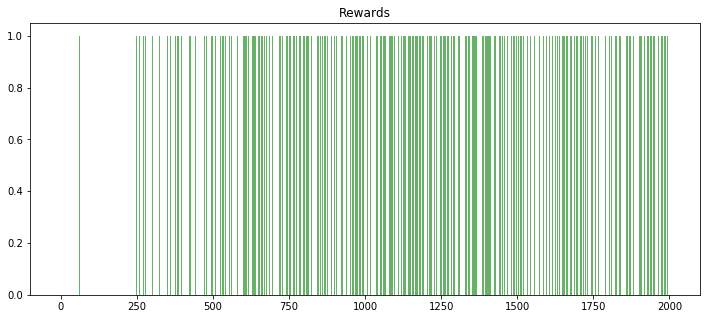

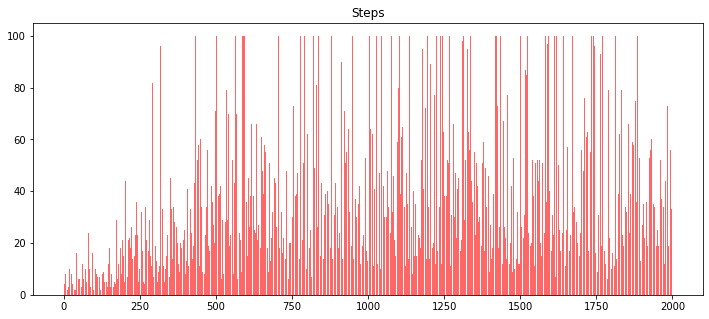

In [26]:
env = gym.make('FrozenLake-v0')
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n

rewards_total = []
steps_total = []

print("Number of actions %i" % env.action_space.n)


# Parameters belonging to the algorithm
num_episodes = 2000
gamma = 0.95
alpha = 0.85

Q = torch.zeros([number_of_states, number_of_actions])

# Loop for each episode
for i in range(num_episodes):
    # Initiatize S
    observation = env.reset()
    steps = 0
    
    while True:
        steps += 1

        # Choose next A from S using policy derived from Q
        # Adding randomness to explore
        random_values = Q[observation] + torch.randn(1, number_of_actions)/1000
        action = torch.argmax(random_values).item()
        
        # Take action A, observce R, S'
        new_observation, reward, done, info = env.step(action)

        # Q(S, A) <- Q(S, A) + alpha[R + gamma max_a(S', a) - Q(S, A)]
        Q[observation, action] = (1-alpha) * Q[observation, action] + alpha * (reward + gamma * torch.max(Q[new_observation]).item())

        # S <- S'
        observation = new_observation        
        
        # Terminate if environment is done
        if done:
            # Store statistics
            steps_total.append(steps)
            rewards_total.append(reward)
            print("Episode finished after %i steps" % steps)
            break

# Simple statistics of solving the environment     
print(Q)

print("Percentage of episodes finished succesfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percentage of episodes finished succesfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.figure(figsize=(12, 5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()

plt.figure(figsize=(12, 5))
plt.title("Steps")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red')
plt.show()

### Q-learning in deterministic environment
Now applying a better exploration technique $\epsilon$-greedy,

\begin{align}
a=\left\{\begin{array}{ll}\text {optimal } a^{*} & 1-\varepsilon \\ \text {random} & \varepsilon\end{array}\right.
\end{align}

Number of actions 4
Episode finished after 4 steps
Episode finished after 3 steps
Episode finished after 11 steps
Episode finished after 13 steps
Episode finished after 9 steps
Episode finished after 8 steps
Episode finished after 5 steps
Episode finished after 5 steps
Episode finished after 15 steps
Episode finished after 4 steps
Episode finished after 15 steps
Episode finished after 10 steps
Episode finished after 6 steps
Episode finished after 4 steps
Episode finished after 8 steps
Episode finished after 3 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 9 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 12 steps
Episode finished after 2 steps
Episode finished after 5 steps
Episode finished after 4 steps
Episode finished after 11 steps
Episode finished after 6 steps
Episode finished after 3 steps
Episode finished after 7 steps
Episode finished after 6 steps
Episode finished after 3 steps
Episode fini

Episode finished after 5 steps
Episode finished after 7 steps
Episode finished after 4 steps
Episode finished after 6 steps
Episode finished after 3 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 7 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 10 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 9 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode

Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 2 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 5 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 3 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 7 steps
Episode finished after 6 steps
Episode 

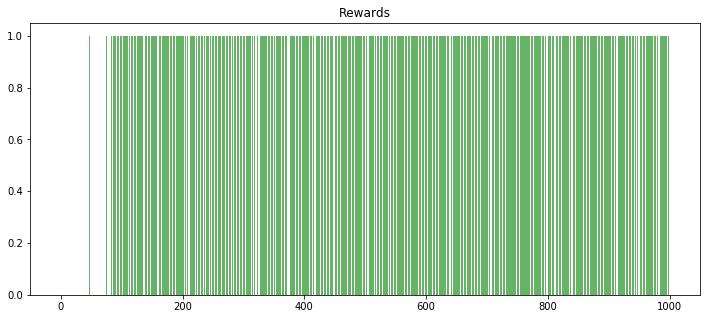

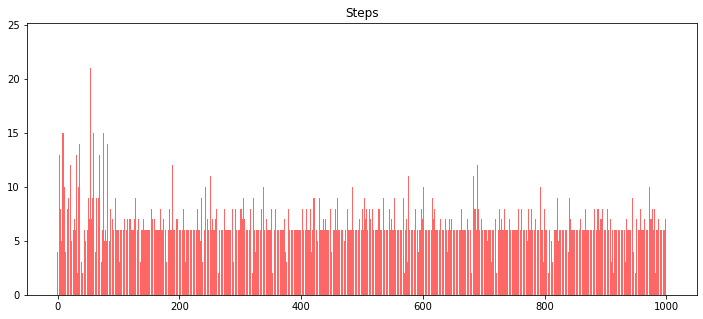

In [77]:
env = gym.make('FrozenLakeNotSlippery-v0')
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n

rewards_total = []
steps_total = []

print("Number of actions %i" % env.action_space.n)


# Parameters belonging to the algorithm
num_episodes = 1000
gamma = 0.95
alpha = 1
epsilon = 0.1

Q = torch.zeros([number_of_states, number_of_actions])

# Loop for each episode
for i in range(num_episodes):
    # Initiatize S
    observation = env.reset()
    steps = 0
    
    while True:
        steps += 1

        # Choose next A from S using policy derived from Q,
        # Using an epsilon-greedy technique
        random_val = torch.rand(1)[0].item()
        if random_val > epsilon:
            random_values = Q[observation] + torch.randn(1, number_of_actions)/1000
            action = torch.argmax(random_values).item()
        else:
            action = env.action_space.sample()
        
        
        # Take action A, observce R, S'
        new_observation, reward, done, info = env.step(action)

        # Q(S, A) <- Q(S, A) + alpha[R + gamma max_a(S', a) - Q(S, A)]
        Q[observation, action] += alpha * (reward + gamma * torch.max(Q[new_observation]).item() - Q[observation, action])

        # S <- S'
        observation = new_observation        
        
        # Terminate if environment is done
        if done:
            # Store statistics
            steps_total.append(steps)
            rewards_total.append(reward)
            print("Episode finished after %i steps" % steps)
            break

# Simple statistics of solving the environment     
print(Q)

print("Percentage of episodes finished succesfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percentage of episodes finished succesfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.figure(figsize=(12, 5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()

plt.figure(figsize=(12, 5))
plt.title("Steps")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red')
plt.show()

We will now, adjust our exploration function by introducing $\epsilon$-greedy with decay.

Number of actions 4
Episode finished after 4 steps
Episode finished after 3 steps
Episode finished after 6 steps
Episode finished after 3 steps
Episode finished after 10 steps
Episode finished after 11 steps
Episode finished after 8 steps
Episode finished after 4 steps
Episode finished after 5 steps
Episode finished after 7 steps
Episode finished after 9 steps
Episode finished after 2 steps
Episode finished after 14 steps
Episode finished after 6 steps
Episode finished after 7 steps
Episode finished after 12 steps
Episode finished after 12 steps
Episode finished after 4 steps
Episode finished after 21 steps
Episode finished after 6 steps
Episode finished after 18 steps
Episode finished after 4 steps
Episode finished after 14 steps
Episode finished after 17 steps
Episode finished after 21 steps
Episode finished after 10 steps
Episode finished after 10 steps
Episode finished after 5 steps
Episode finished after 17 steps
Episode finished after 11 steps
Episode finished after 2 steps
Episo

Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 10 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 3 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 14 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 5 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 9 steps
Episode finished after 7 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 7 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episod

Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 2 steps
Episode finished after 6 steps
Episode finished after 10 steps
Episode finished after 9 steps
Episode finished after 6 steps
Episode finished after 2 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 10 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 12 steps
Episode finished after 4 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 7 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 4 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 2 steps
Episo

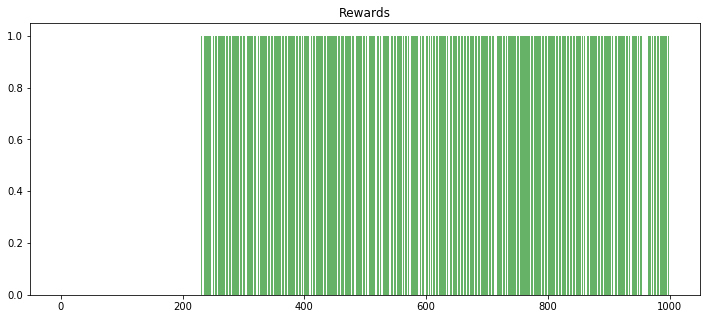

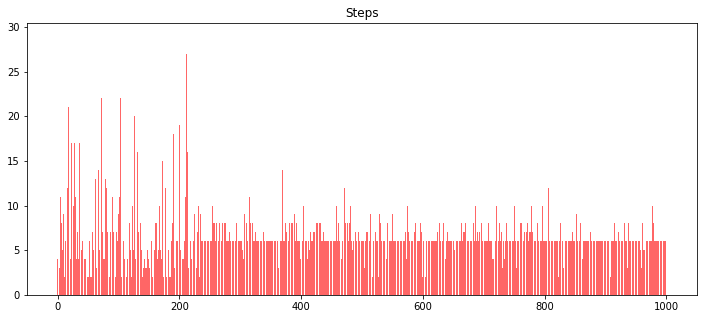

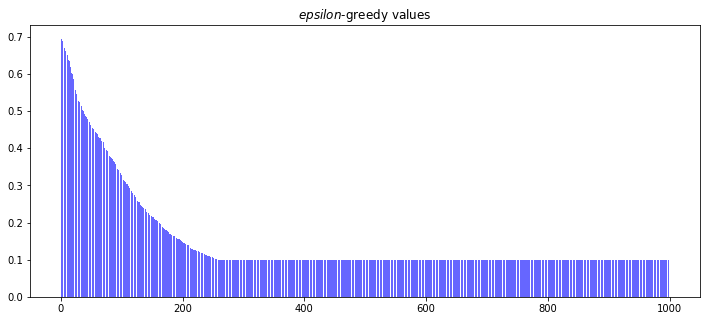

In [103]:
env = gym.make('FrozenLakeNotSlippery-v0')
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n

rewards_total = []
steps_total = []
egreedy_total = []

print("Number of actions %i" % env.action_space.n)


# Parameters belonging to the algorithm
num_episodes = 1000
gamma = 0.95
alpha = 0.99

epsilon = 0.7
epsilon_final = 0.1
epsilon_decay = 0.999

Q = torch.zeros([number_of_states, number_of_actions])

# Loop for each episode
for i in range(num_episodes):
    # Initiatize S
    observation = env.reset()
    steps = 0
    
    while True:
        steps += 1

        # Choose next A from S using policy derived from Q,
        # Using an epsilon-greedy technique
        random_val = torch.rand(1)[0].item()
        if random_val > epsilon:
            random_values = Q[observation] + torch.randn(1, number_of_actions)/1000
            action = torch.argmax(random_values).item()
        else:
            action = env.action_space.sample()
        
        if epsilon > epsilon_final:
            epsilon *= epsilon_decay
        
        # Take action A, observce R, S'
        new_observation, reward, done, info = env.step(action)

        # Q(S, A) <- Q(S, A) + alpha[R + gamma max_a(S', a) - Q(S, A)]
        Q[observation, action] += alpha * (reward + gamma * torch.max(Q[new_observation]).item() - Q[observation, action])

        # S <- S'
        observation = new_observation
        
        # Terminate if environment is done
        if done:
            # Store statistics
            egreedy_total.append(epsilon)
            steps_total.append(steps)
            rewards_total.append(reward)
            print("Episode finished after %i steps" % steps)
            break

# Simple statistics of solving the environment     
print(Q)

print("Percentage of episodes finished succesfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percentage of episodes finished succesfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.figure(figsize=(12, 5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()

plt.figure(figsize=(12, 5))
plt.title("Steps")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red')
plt.show()

plt.figure(figsize=(12, 5))
plt.title("$epsilon$-greedy values")
plt.bar(torch.arange(len(egreedy_total)), egreedy_total, alpha=0.6, color='blue')
plt.show()